<a href="https://colab.research.google.com/github/beatrizjafelice/Airline-Passenger-Satisfaction/blob/master/Airline_Passenger_Satisfaction_EN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment
1. Obtain a dataset relevant to an area of interest.
2. Implement the necessary preprocessing steps.
3. Evaluate and compare the performance of a minimum of two classifiers, including at least one individual classifier and one ensemble method.
4. Conduct experiments with parameter variations, testing at least two values for each parameter.
5. Document and present the findings from the evaluation process.

## Loading the Data

The selected dataset is the [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) dataset, available on Kaggle. The training and test datasets are provided separately. The dataset consists of 25 columns, including:

- Essential passenger details like age, gender, and loyalty status.
- Trip-related information such as travel type, class, flight distance, and arrival/departure delay times.
- Rating columns spanning from 1 to 5, covering different aspects of the journey.
- The target variable indicating passenger satisfaction, categorized into "neutral or dissatisfied" or "satisfied" classes. <br>

<br>


**Metadata retrieved from the dataset description:**

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction) <br>

<br>

Therefore, this task is a binary classification problem focusing on passenger satisfaction (satisfied/neutral or dissatisfied) as the target variable. It entails testing two individual classification models (Logistic Regression and kNN) and two ensemble methods (XGBoost and Random Forest), all fine-tuned after parameter adjustment. Subsequently, the performance of these diverse models will be evaluated and compared.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import cv
from xgboost import XGBClassifier

In [ ]:
df_train = pd.read_csv('https://drive.google.com/u/3/uc?id=1pSDMxwSWk-3gGS39ElgMPSefr0mHKEk5&export=download', index_col='Unnamed: 0')
df_test = pd.read_csv('https://drive.google.com/u/3/uc?id=1t7GDVfkMDAC7Qhpbbm83FtZBKAr7exBD&export=download', index_col='Unnamed: 0')

In [ ]:
print(df_train.shape)
print(df_test.shape)

(103904, 24)
(25976, 24)


In [ ]:
# Merging the datasets
df = pd.concat([df_train, df_test])
print(df.shape)
df.head()

(129880, 24)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Exploratory Data Analysis

In [ ]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [ ]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Checking for missing values:

In [ ]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

It is observed that the "Arrival Delay in Minutes" column has some missing values. We will proceed with the analysis to determine the best way to handle this issue.

Checking for duplicate rows:

In [ ]:
df[df.duplicated()]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


Checking the number of observations per label:

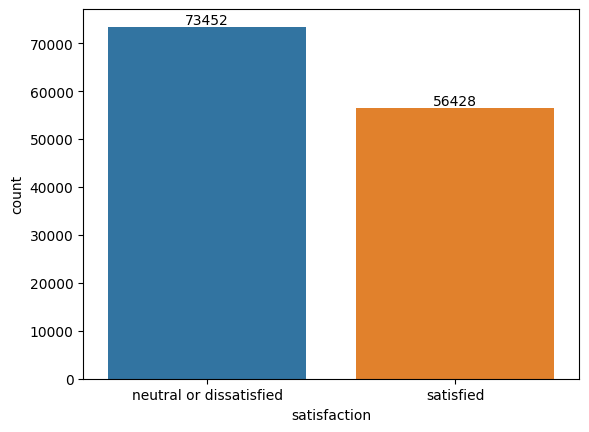

In [ ]:
df_sat = df['satisfaction'].value_counts().to_frame().reset_index()
ax = sns.barplot(x='satisfaction', y='count',
                 hue='satisfaction', data=df_sat)
for i in ax.containers:
    ax.bar_label(i,)

Keeping the features of interest:

In [ ]:
df.drop(['id', 'Age', 'Gender', 'Flight Distance'], axis = 1, inplace=True)
df.head()

,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,disloyal Customer,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Loyal Customer,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Loyal Customer,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


Using a heatmap to analyze the correlation between variables:

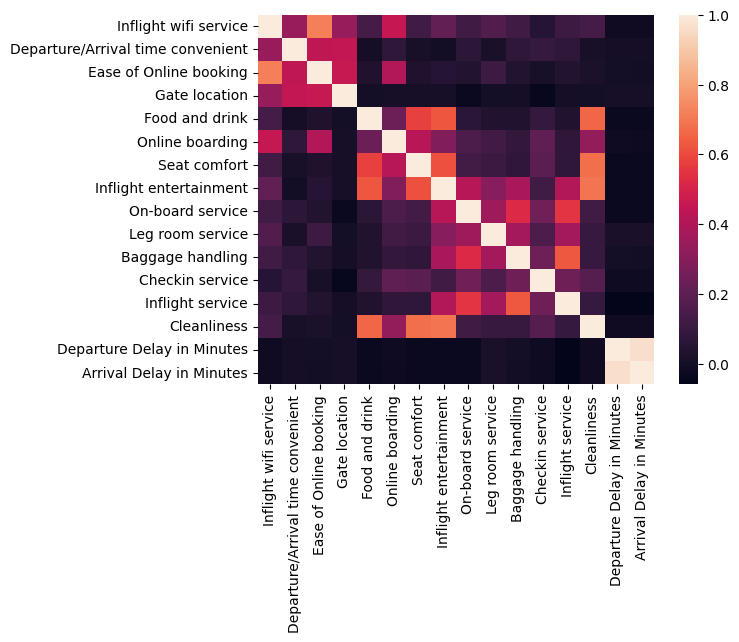

In [ ]:
matriz_corr = df.corr(numeric_only=True)
sns.heatmap(matriz_corr)
plt.show()

Filtering pairs of variables with a correlation greater than 0.5 for improved visualization:

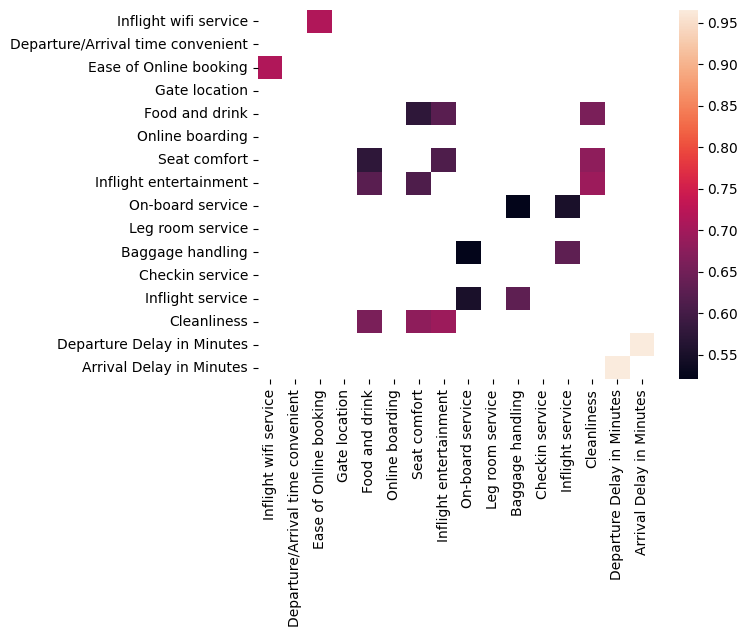

In [ ]:
sns.heatmap(matriz_corr[(matriz_corr > 0.5) & (matriz_corr < 1)])
plt.show()

A strong positive correlation between departure and arrival delay times is observed. We can explore this correlation using the graph below:

0.9652911835463196


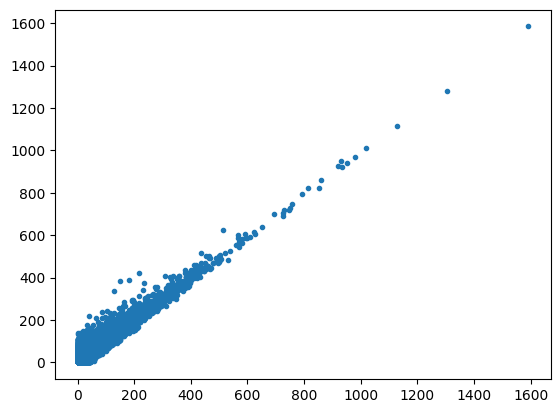

In [ ]:
print(df['Departure Delay in Minutes'].corr(df['Arrival Delay in Minutes']))
plt.plot(df['Departure Delay in Minutes'], df['Arrival Delay in Minutes'], '.')

Now, checking the number of missing values for each column:

In [ ]:
df[['Arrival Delay in Minutes', 'Departure Delay in Minutes']].isnull().sum()

Arrival Delay in Minutes      393
Departure Delay in Minutes      0
dtype: int64

As previously noted, the "Arrival Delay in Minutes" column contains some missing values. Therefore, this variable will be dropped from the dataset.

In [ ]:
df.drop(['Arrival Delay in Minutes'], axis = 1, inplace=True)
df.head()

,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,disloyal Customer,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,Loyal Customer,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Loyal Customer,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied


Plotting a graph with class distributions for categorical variables:

In [ ]:
def showCategorical(df, column):
  # Preparing the dataset
  prop = df[column].value_counts().to_frame().reset_index().rename(columns={'count': 'total'})
  cat_1 = df.groupby([column, 'satisfaction']).agg({'satisfaction': 'count'}).rename(columns={'satisfaction': 'count'}).reset_index()
  qtd = pd.merge(cat_1, prop, on=column, how='left')
  qtd['prop'] = round((qtd['count'] / qtd['total'] * 100), 2)
  qtd.drop(['total', 'count'], axis=1, inplace=True)

  # Plotting the graph
  plt.figure(figsize=(10, 6))
  palette = sns.color_palette("viridis", 2)
  barplot = sns.barplot(x=column, y="prop", hue="satisfaction", data=qtd, palette=palette)
  plt.title(f'{column} x Satisfaction')
  plt.ylabel('Proportion (%)')
  plt.xlabel(column)
  plt.ylim(0, 100)
  plt.legend(title='Satisfaction')

  # Adding data labels
  for p in barplot.containers:
      barplot.bar_label(p, fmt='%.2f%%', label_type='edge', padding=3)

  plt.show()

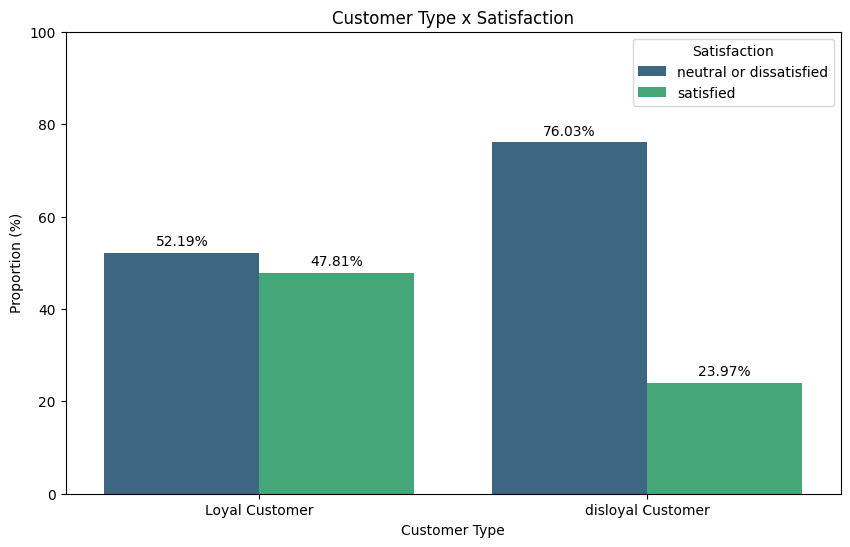

In [ ]:
showCategorical(df, 'Customer Type')

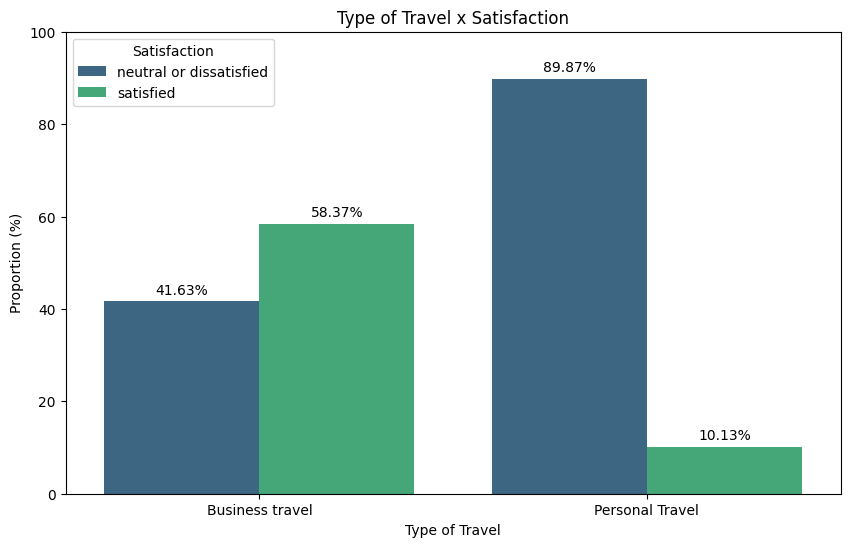

In [ ]:
showCategorical(df, 'Type of Travel')

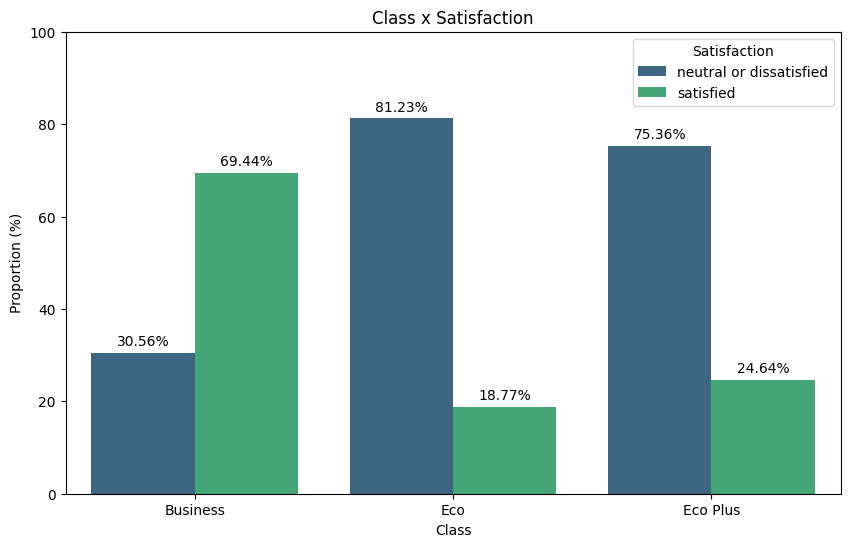

In [ ]:
showCategorical(df, 'Class')

## Data Preprocessing

Transforming categorical variables:

In [ ]:
df['satisfied'] = np.where(df['satisfaction'] == 'satisfied', 1, 0)
df.drop('satisfaction', axis=1, inplace=True)
df.head()

,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfied
0,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0
1,disloyal Customer,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0
2,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1
3,Loyal Customer,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0
4,Loyal Customer,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1


In [ ]:
df['Loyal Customer'] = np.where(df['Customer Type'] == 'Loyal Customer', 1, 0)
df['Business Travel'] = np.where(df['Type of Travel'] == 'Business travel', 1, 0)
df.drop(['Customer Type', 'Type of Travel'], axis=1, inplace=True)
df.head()

,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfied,Loyal Customer,Business Travel
0,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0,1,0
1,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0,0,1
2,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1,1,1
3,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0,1,1
4,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1,1,1


In [ ]:
class_dummies = pd.get_dummies(df['Class'], drop_first = True)
df = df.drop('Class', axis=1)
df = df.assign(**class_dummies)
df.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfied,Loyal Customer,Business Travel,Eco,Eco Plus
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0,1,0,False,True
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0,0,1,False,False
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1,1,1,False,False
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0,1,1,False,False
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1,1,1,False,False


Separating features from target:

In [ ]:
X = df.drop('satisfied', axis=1).copy()
print(X.shape)
y = df['satisfied'].copy()
print(y.shape)

(129880, 19)
(129880,)


Splitting the dataset into training and test sets: <br>
**Note:** for more reliable results, the split will be performed randomly, so the original training and testing separation will not be considered.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

Scaling the data:

In [ ]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

## Modeling

The function below summarizes the performance of a classification model on training and test sets and will be used in the next steps.

In [ ]:
def displayMetrics(modelo):
  # Training metrics
  y_pred_train = modelo.predict(X_train.values)

  # Test metrics
  y_pred_test = modelo.predict(X_test.values)

  print("---------------- Training metrics ----------------")
  print(classification_report(y_train, y_pred_train))
  cm = confusion_matrix(y_train, y_pred_train, labels=modelo.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.classes_)
  disp.plot()
  plt.title("Confusion Matrix")
  plt.show()

  print(" ")

  print("---------------- Test metrics ----------------")
  print(classification_report(y_test, y_pred_test))
  cm = confusion_matrix(y_test, y_pred_test, labels=modelo.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.classes_)
  disp.plot()
  plt.title("Confusion Matrix")
  plt.show()

For model training, we will use the Stratified K-Fold Cross-Validation technique. The folds will be used for parameter tuning with the **GridSearch** method. Given a dictionary with a range of values for each parameter, GridSearch tests all possible combinations and returns the one that yields the best performance scores. Since this is a computationally costly method, we will test only a reduced number of parameter values for demonstration.

In [ ]:
# Stratified K-Fold CV keeps the same distribution of labels in each fold
skf = StratifiedKFold(5)
folds = skf.split(X_train, y_train)
folds_list = list(folds)

### Single Classifiers

First, we will start with two commonly used classifiers in machine learning problems: Logistic Regression and k-Nearest Neighbors (kNN).

#### Classifier #1: Logistic Regression

The first classifier to be tested is Logistic Regression. This is a classification method that models the probability that a given input belongs to a particular class. Logistic Regression fits a sigmoid function to the data, which returns values between 0 and 1. Values closer to 1 indicate a higher probability of belonging to the positive class, while values closer to 0 indicate a higher probability of belonging to the negative class.

Parameter tuning:

In [ ]:
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['lbfgs', 'saga'],
    'model__max_iter': [100, 300],
    'model__tol': [1e-3, 1e-5]
}

# Creating a pipeline
clf_pipe = Pipeline(steps = [('scaler', StandardScaler()),
                             ('model', LogisticRegression())])

# Setting up a GridSearch object for parameter tuning
lr_search = GridSearchCV(clf_pipe, param_grid, cv=folds_list, scoring=['f1', 'roc_auc'], refit='f1', n_jobs=-1, verbose=False)

# Fitting the GridSearch to the training data
lr_search.fit(X_train.values, y_train)

# Retrieving the best parameters and the best score
best_params = lr_search.best_params_
best_score = lr_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


Best parameters: {'model__C': 0.1, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.001}
Best score: 0.8509617575657327


Training and assessing the model with the best parameters:

---------------- Training metrics ----------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     55089
           1       0.87      0.84      0.85     42321

    accuracy                           0.87     97410
   macro avg       0.87      0.87      0.87     97410
weighted avg       0.87      0.87      0.87     97410



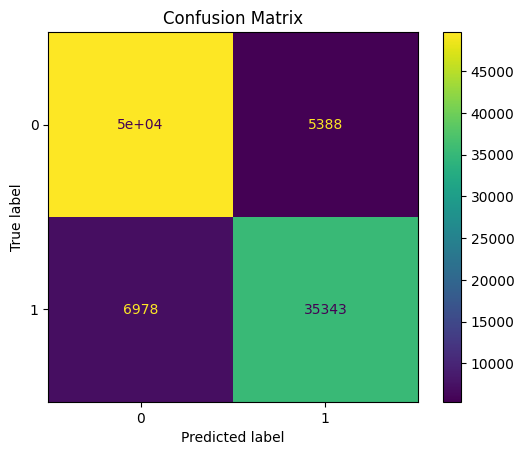

 
---------------- Test metrics ----------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     18363
           1       0.87      0.83      0.85     14107

    accuracy                           0.88     32470
   macro avg       0.87      0.87      0.87     32470
weighted avg       0.88      0.88      0.87     32470



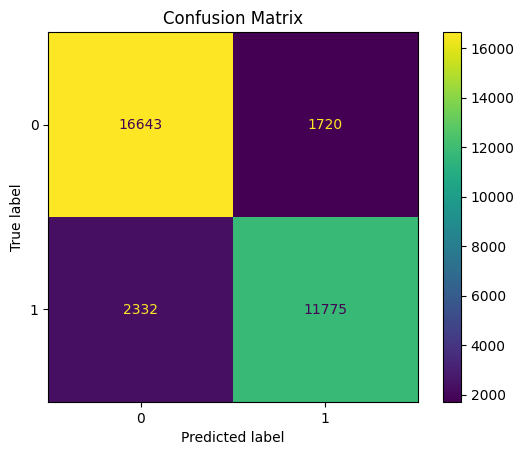

In [ ]:
best_estimator = lr_search.best_estimator_
displayMetrics(best_estimator)

Logistic Regression produced consistent results on both the training and test sets, with an accuracy and F1-Score of 87%.

#### Classifier #2: k-Nearest Neighbors (kNN)

Second, we will test the kNN (k-Nearest Neighbors) model. This learning algorithm can be used for both classification and regression tasks. In classification, kNN estimates the class of a given object by considering the most frequent or likely class label among its k nearest neighbors. The similarity between data points is measured using a distance metric, such as Euclidean distance. Choosing the right value for k is crucial, as it significantly affects the model's performance. A very small value for k can make the model overly sensitive to noise and lead to overfitting, while a very large value for k can result in an overly generalized model, causing underfitting.

Parameter tuning:

In [ ]:
param_grid = {
    'model__n_neighbors': [7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'kd_tree']
}

# Creating a pipeline
clf_pipe = Pipeline(steps = [('scaler', StandardScaler()),
                             ('model', KNeighborsClassifier())])

# Setting up a GridSearch object for parameter tuning
knn_search = GridSearchCV(clf_pipe, param_grid=param_grid, cv=folds_list, scoring=['f1', 'roc_auc'], refit='f1', n_jobs=-1)

# Fitting the GridSearch to the training data
knn_search.fit(X_train, y_train)

# Retrieving the best parameters and the best score
best_params = knn_search.best_params_
best_score = knn_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'model__algorithm': 'kd_tree', 'model__n_neighbors': 7, 'model__weights': 'distance'}
Best score: 0.9201963009421481


Training and assessing the model with the best parameters:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


---------------- Training metrics ----------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55089
           1       1.00      1.00      1.00     42321

    accuracy                           1.00     97410
   macro avg       1.00      1.00      1.00     97410
weighted avg       1.00      1.00      1.00     97410



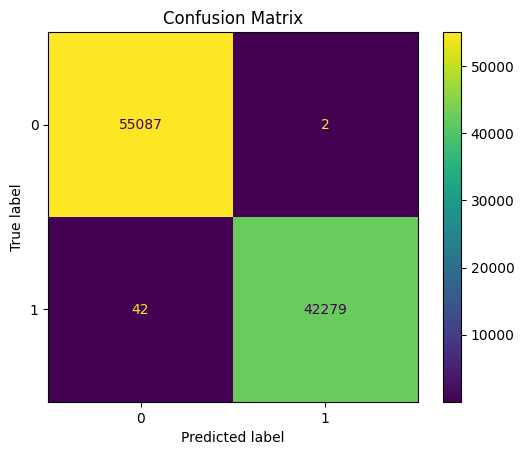

 
---------------- Test metrics ----------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     18363
           1       0.96      0.88      0.92     14107

    accuracy                           0.93     32470
   macro avg       0.94      0.93      0.93     32470
weighted avg       0.93      0.93      0.93     32470



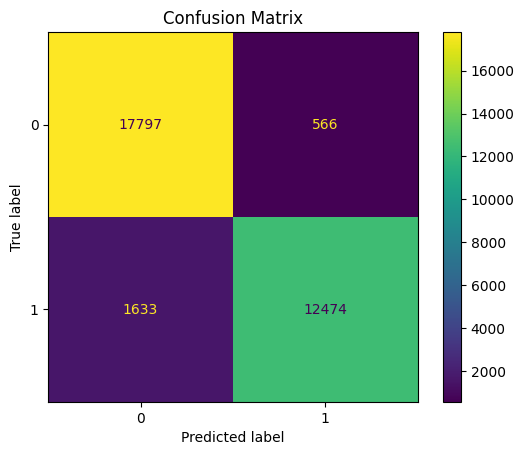

In [ ]:
best_estimator = knn_search.best_estimator_
displayMetrics(best_estimator)

Although the GridSearch yielded a model with the lowest value of k as the best model, the kNN displayed perfect scores on the training set (1.00), suggesting overfitting. However, on the test set, both accuracy and F1-Score decreased to 93%, indicating poor generalization to new data.

### Ensemble Methods

Next, we will explore two Ensemble methods: XGBoost and Random Forest. Ensemble methods combine multiple 'weak' predictors to create a stronger final predictor. These methods typically outperform individual classifiers by aggregating multiple predictions, resulting in more precise and stable models. Ensembles mitigate the risk of overfitting and enhance generalization by capturing diverse facets of the training data. We will later compare the performance of these methods to that of the individual classifiers.

#### Classifier #3: XGBoost

First up is XGBoost. XGBoost (Extreme Gradient Boosting) is a machine learning algorithm grounded in decision trees that sequentially trains its predictors. At each iteration, the model rectifies the errors made by prior trees by adjusting the residuals (differences between predicted and actual values) of the previous model. Consequently, each new tree "learns" from the mistakes of its predecessors. Moreover, XGBoost incorporates regularization techniques (e.g., L1 and L2) to prevent overfitting and facilitates parallel processing, optimizing the learning process. These attributes render XGBoost a powerful and efficient method for tackling classification and regression tasks.

Parameter tuning:

In [ ]:
param_grid = {
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__n_estimators': [100, 300]
}

# Creating a pipeline
clf_pipe = Pipeline(steps = [('scaler', StandardScaler()),
                             ('model', XGBClassifier())])

# Setting up a GridSearch object for parameter tuning
xgb_search = GridSearchCV(clf_pipe, param_grid=param_grid, cv=folds_list, scoring=['f1', 'roc_auc'], refit='f1', n_jobs=-1)

# Fitting the GridSearch to the training data
xgb_search.fit(X_train, y_train)

# Retrieving the best parameters and the best score
best_params = xgb_search.best_params_
best_score = xgb_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 300}
Best score: 0.955349069257798


Training and assessing the model with the best parameters:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


---------------- Training metrics ----------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     55089
           1       0.98      0.96      0.97     42321

    accuracy                           0.98     97410
   macro avg       0.98      0.97      0.98     97410
weighted avg       0.98      0.98      0.98     97410



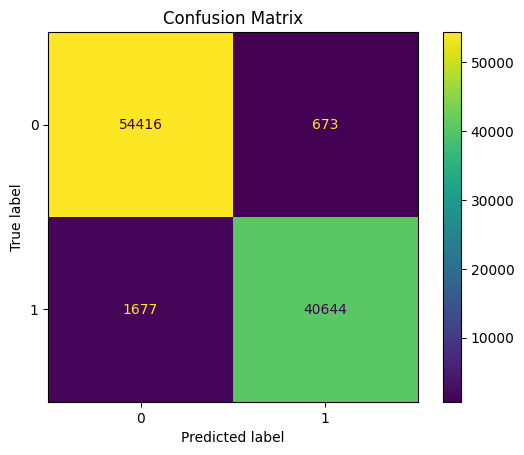

 
---------------- Test metrics ----------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18363
           1       0.97      0.94      0.96     14107

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



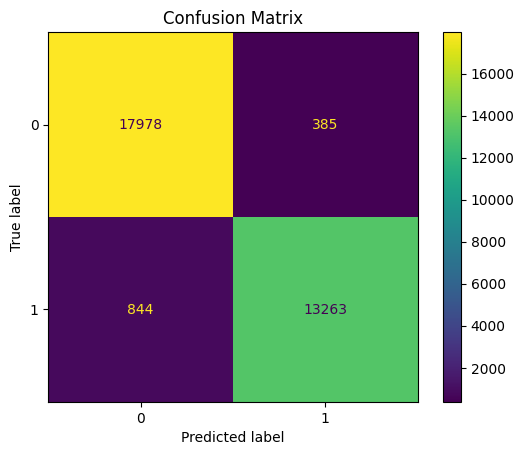

In [ ]:
best_estimator = xgb_search.best_estimator_
displayMetrics(best_estimator)

Checking the relevance of each variable (feature importance) in predicting the final response:

Text(0.5, 1.0, 'Feature Importance')

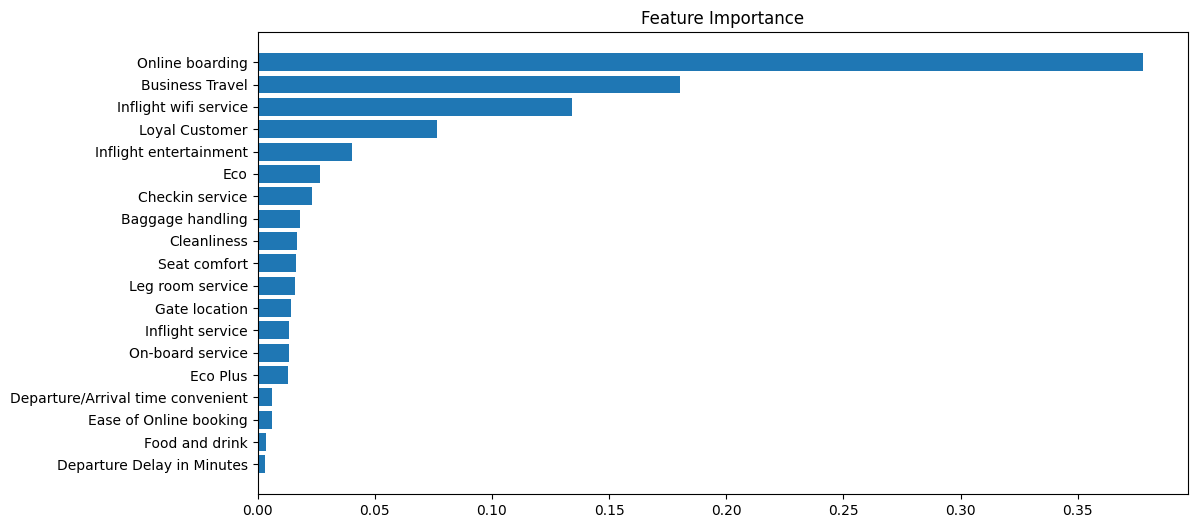

In [ ]:
estimator = best_estimator.named_steps['model']
feature_importance = estimator.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

XGBoost achieved an F1-Score of 97% on the training set and 96% on the test set. This indicates a well-balanced performance, with a slight variance between its fit to the training data and its generalization to new data, which is expected. Furthermore, like other Ensemble methods, XGBoost enables the analysis of feature importance in the decision-making process. Notably, Online Boarding, Business Travel, and Inflight Wifi Service emerged as the top three most relevant variables.

#### Classifier #4: Random Forest

The final classifier to be tested is Random Forest. This Ensemble method trains multiple decision trees using randomly selected samples from the dataset with replacement (bootstrap). Additionally, each tree considers a random subset of variables to determine optimal node splits, thus creating diverse trees and mitigating overfitting. The key parameters for this model include the number of trees in the forest (n_estimators) and the maximum depth of each tree (max_depth). The predicted class is determined by the majority vote among individual trees. Despite its robustness and accuracy, Random Forest can be computationally expensive, particularly for large datasets.

Parameter tuning:

In [ ]:
param_grid = {'model__n_estimators': [100, 200],
             'model__max_depth': [10, 20],
             'model__min_samples_leaf': [4, 6]}


# Creating a pipeline
clf_pipe = Pipeline(steps = [('scaler', StandardScaler()),
                             ('model', RandomForestClassifier())])

# Setting up a GridSearch object for parameter tuning
rf_search = GridSearchCV(clf_pipe, param_grid, cv = folds_list, scoring=['f1', 'roc_auc'], refit='f1', n_jobs=-1)

# Fitting the GridSearch to the training data
rf_search.fit(X_train, y_train)

# Retrieving the best parameters and the best score
best_params = rf_search.best_params_
best_score = rf_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'model__max_depth': 20, 'model__min_samples_leaf': 4, 'model__n_estimators': 200}
Best score: 0.9532445462495251


Training and assessing the model with the best parameters:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


---------------- Training metrics ----------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     55089
           1       0.98      0.95      0.97     42321

    accuracy                           0.97     97410
   macro avg       0.97      0.97      0.97     97410
weighted avg       0.97      0.97      0.97     97410



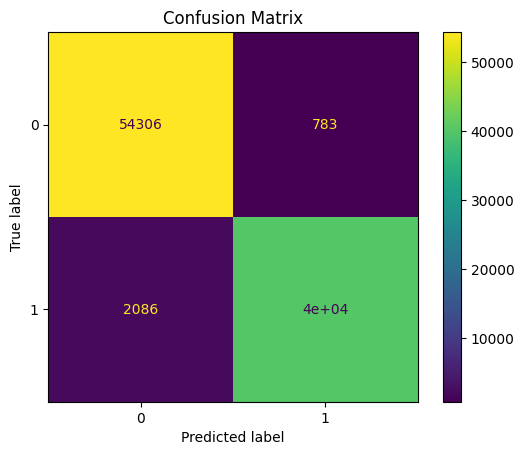

 
---------------- Test metrics ----------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     18363
           1       0.97      0.94      0.95     14107

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



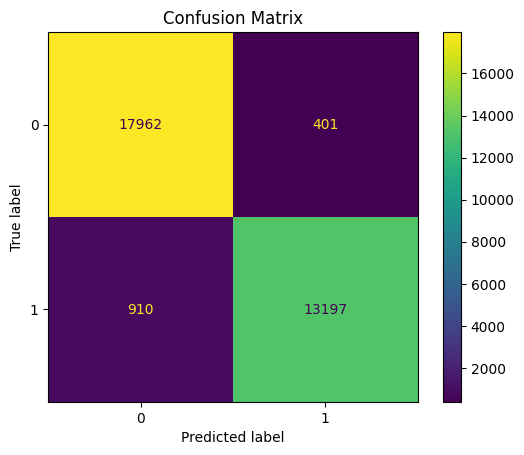

In [ ]:
best_estimator = rf_search.best_estimator_
displayMetrics(best_estimator)

Checking the relevance of each variable (feature importance) in predicting the final response:

Text(0.5, 1.0, 'Feature Importance')

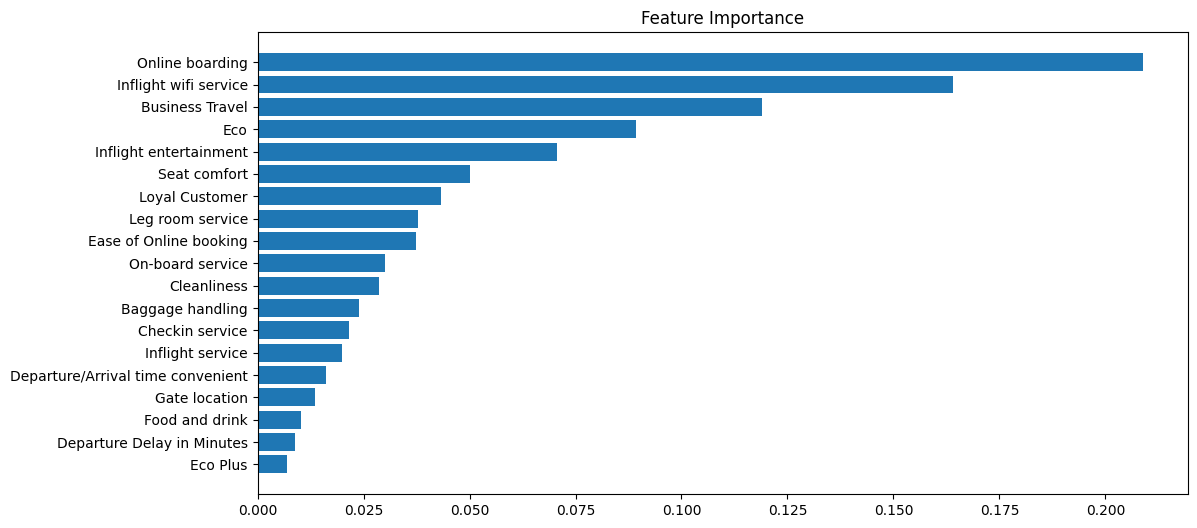

In [ ]:
estimator = best_estimator.named_steps['model']
feature_importance = estimator.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Random Forest achieved an F1-Score of 97% on the training set and 96% on the test set, mirroring XGBoost's performance. This model also showed strong generalization capabilities, maintaining consistent performance across training and testing data. Interestingly, while the three most influential variables align with those identified by XGBoost, their order of importance differs slightly. Notably, Online Boarding retained its position as the most crucial factor in determining passenger satisfaction.

## Results

- The ensemble methods (XGBoost and Random Forest) surpassed the individual classifiers (Logistic Regression and kNN) in terms of performance and stability across training and test sets. Despite its simplicity and interpretability, Logistic Regression exhibited inferior performance. Conversely, kNN displayed signs of overfitting, evident in its perfect metrics on the training set and subsequent drop in performance on the test set.

- By combining multiple predictors and mitigating overfitting risks, ensemble methods demonstrated robust and accurate performance. Both XGBoost and Random Forest exhibited comparable and superior performance to the individual classifiers.

- In conclusion, for this problem, ensemble methods showed superior performance and generalization capabilities compared to the individual classifiers assessed.